In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Akanksha\Downloads\IMDB Dataset.csv")

data.sample(5)

,review,sentiment
36258,I love this movie. I just saw it for the first...,positive
12306,the worst movie i have ever seen i didn't even...,negative
49864,Thanks to the helpfulness of a fellow IMDb mem...,positive
7470,Delightful film directed by some of the best d...,positive
2299,Bela Lugosi gets to play one of his rare good ...,positive


In [3]:
# Basic Data Inspection
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (50000, 2)

Column Names:
 Index(['review', 'sentiment'], dtype='object')

Missing Values:
 review       0
sentiment    0
dtype: int64


In [4]:
# Rename Columns (Clean Naming)
data.rename(columns={
    'review': 'text',
    'sentiment': 'label'
}, inplace=True)

data.head()

,text,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Encode Target Variable
data['label'] = data['label'].map({
    'positive': 1,
    'negative': 0
})

data['label'].value_counts()

label
1    25000
0    25000
Name: count, dtype: int64

In [6]:
# Text Cleaning Function
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akanksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akanksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Apply Text Cleaning
data['clean_text'] = data['text'].apply(clean_text)

data[['text', 'clean_text']].head()

,text,clean_text
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [10]:
from sklearn.model_selection import train_test_split

X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (40000,)
Testing Size: (10000,)


In [11]:
# Text Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [15]:
# Model Predictions
y_pred = model.predict(X_test_tfidf)

In [16]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.891

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



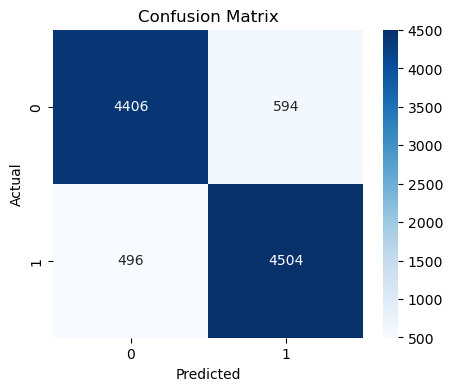

In [18]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Test on New Unseen Text
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

predict_sentiment("The service was amazing and staff was very polite")

'Positive'

In [20]:
# Error Analysis 
test_results = X_test.to_frame()
test_results['actual'] = y_test.values
test_results['predicted'] = y_pred

misclassified = test_results[test_results['actual'] != test_results['predicted']]
misclassified.head(10)

,clean_text,actual,predicted
39791,story bride fair amusing engaging one filmmake...,0,1
40714,little quentin seems mastered art cake eating ...,0,1
31882,film listed made film available something weir...,0,1
7266,farrah fawcett give award nominated performanc...,1,0
11840,known brad linaweaver florida state u early in...,0,1
48388,order enjoy fur imaginary portrait diane arbus...,0,1
20169,quite fan novelistscreenwriter michael chabon ...,0,1
26800,tenshu imprisoned sentenced death survives ele...,1,0
46536,cant believe comment show show genius sure doe...,1,0
39806,ive seen branaghs hamlet branagh old speaks fr...,1,0


In [22]:
#Conclusion
# - Built a supervised text classification system using unstructured text data.
# - Applied text preprocessing, TF-IDF vectorization, and Logistic Regression.
# - Achieved strong classification performance on unseen data.
# - System can be extended to complaint severity or spam detection.

In [ ]:
# Uses Unstructured Data (Text)
# Performs Text Classification (Sentiment)
# Includes ML model training and evaluation
# Includes error analysis
# Notebook-based 